In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/placement-prediction-dataset/placementdata.csv


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("/kaggle/input/placement-prediction-dataset/placementdata.csv")

In [3]:
df.head()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed


In [4]:
df['Internships'].unique()

array([1, 0, 2])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  object 
 8   PlacementTraining          10000 non-null  object 
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


In [6]:
df.describe()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,SSC_Marks,HSC_Marks
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,7.698010,1.049200,2.026600,1.013200,79.449900,4.323960,69.159400,74.501500
std,2886.89568,0.640131,0.665901,0.867968,0.904272,8.159997,0.411622,10.430459,8.919527
min,1.00000,6.500000,0.000000,0.000000,0.000000,60.000000,3.000000,55.000000,57.000000
25%,2500.75000,7.400000,1.000000,1.000000,0.000000,73.000000,4.000000,59.000000,67.000000
50%,5000.50000,7.700000,1.000000,2.000000,1.000000,80.000000,4.400000,70.000000,73.000000
75%,7500.25000,8.200000,1.000000,3.000000,2.000000,87.000000,4.700000,78.000000,83.000000
max,10000.00000,9.100000,2.000000,3.000000,3.000000,90.000000,4.800000,90.000000,88.000000


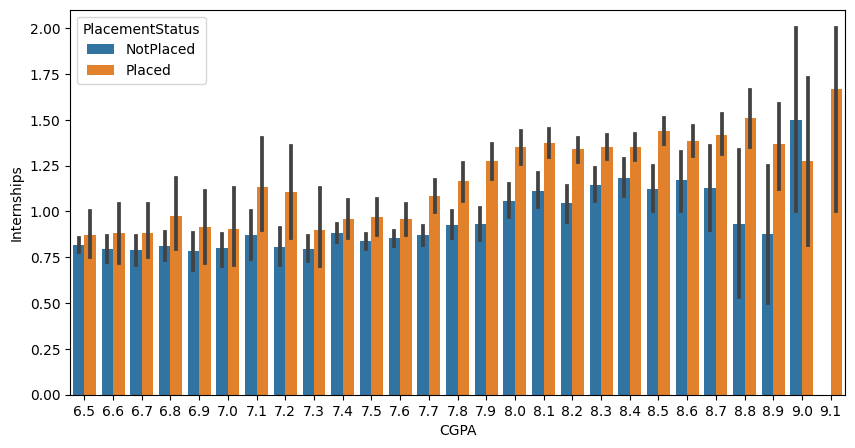

In [9]:
plt.figure(figsize=(10,5))
sns.barplot(x="CGPA",y="Internships",data=df, hue="PlacementStatus")
plt.show()

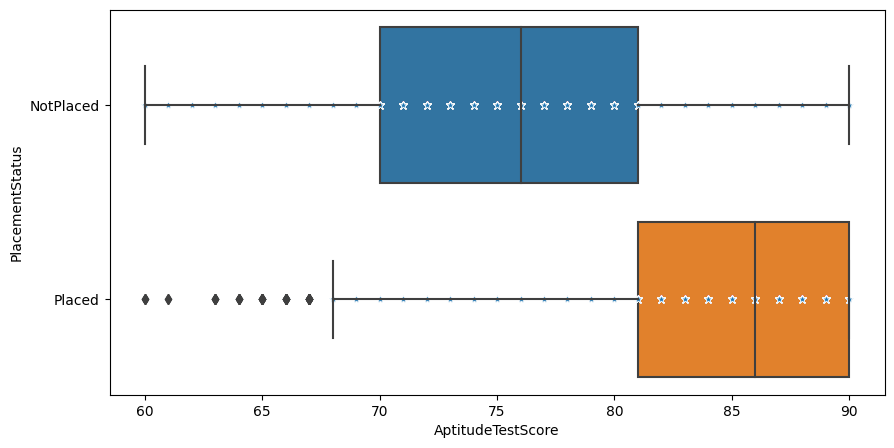

In [10]:
plt.figure(figsize=(10,5))
sns.boxplot(x="AptitudeTestScore",y="PlacementStatus",data=df)
sns.scatterplot(x="AptitudeTestScore",y="PlacementStatus",data=df,marker="*") 
plt.show()

<Axes: xlabel='CGPA', ylabel='ExtracurricularActivities'>

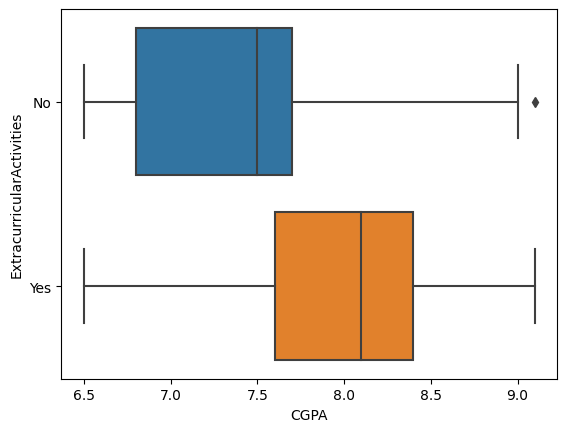

In [11]:
sns.boxplot(x='CGPA',y="ExtracurricularActivities",data=df)

<Axes: xlabel='SoftSkillsRating', ylabel='ExtracurricularActivities'>

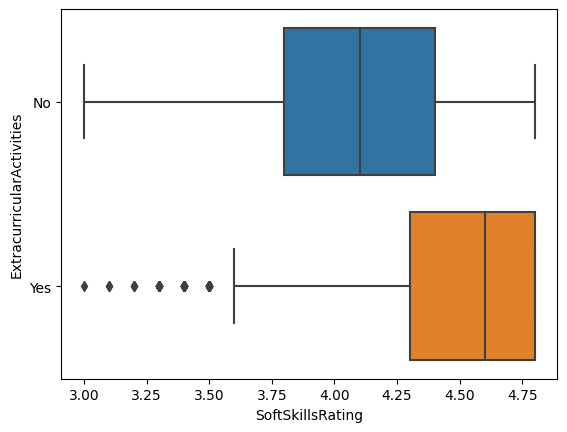

In [12]:
sns.boxplot(x="SoftSkillsRating",y="ExtracurricularActivities",data=df)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Projects', ylabel='Internships'>

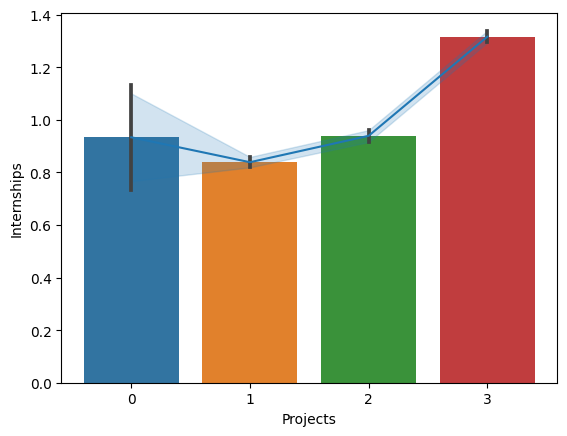

In [14]:
sns.barplot(x="Projects",y="Internships",data=df)
sns.lineplot(x="Projects",y="Internships",data=df)

In [16]:
df["PlacementTraining"]=df["PlacementTraining"].map({"Yes":1,"No":0})
df["PlacementStatus"]=df["PlacementStatus"].map({"Placed":1,"NotPlaced":0})
df["ExtracurricularActivities"]=df["ExtracurricularActivities"].map({"Yes":1,"No":0})

<Axes: >

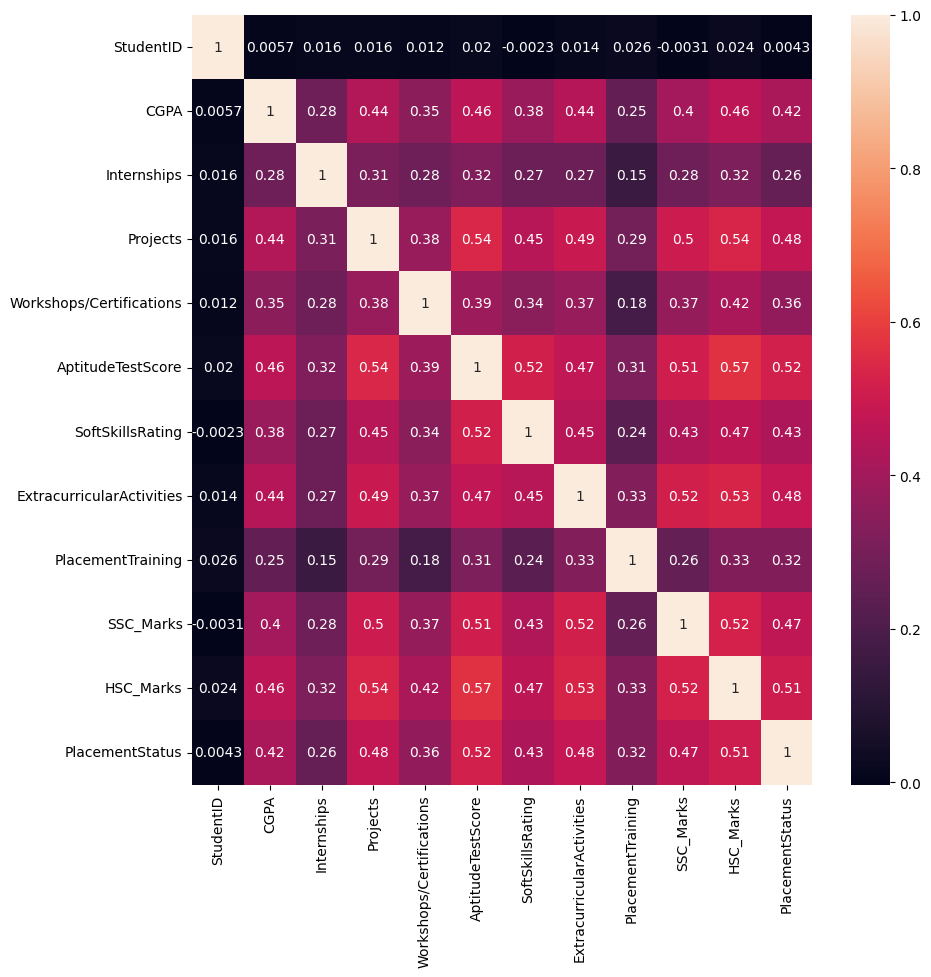

In [18]:
corr=df.corr() 
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

In [19]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1:]

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [23]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=2000)
model=model.fit(x_train,y_train)

<ipython-input-23-7e28ebd2f148>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model=model.fit(x_train,y_train)


In [24]:
result=model.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,result)

0.789